# Bernouli Naive Bayes on SUV Launch Dataset

--------------------------- %%% --------------------------

# Problem Statement:

This dataset contains information of users in a social network. This social network has several business clients which can post ads on it. One of the clients has a car company which has just launched a luxury SUV for a ridiculous price. Build a Bernoulli Naïve Bayes model using this dataset and classify which of the users of the social network are going to purchase this luxury SUV. 1 implies that there was a purchase and 0 implies there wasn’t a purchase.

Lets Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('NB_Car_Ad.csv')
data.shape
                   

(400, 5)

In [3]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

<AxesSubplot:>

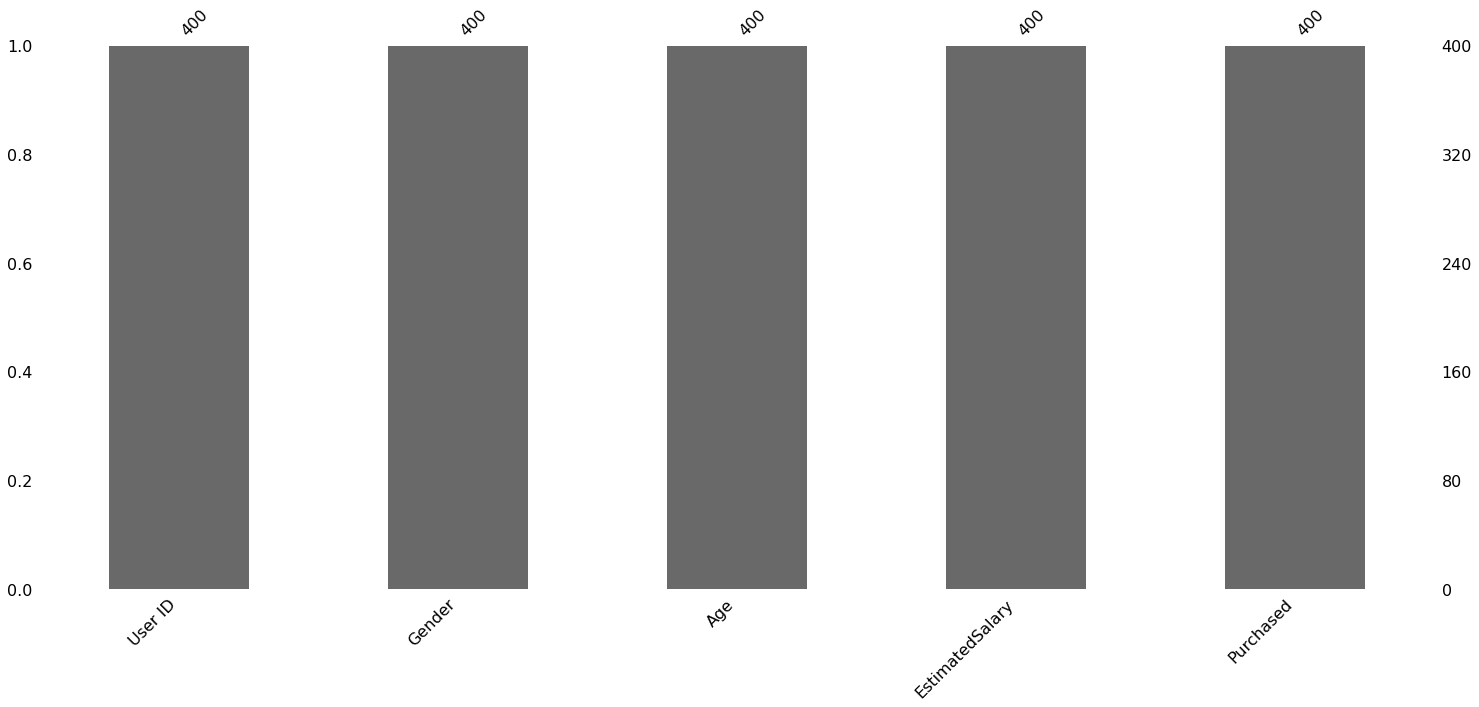

In [6]:
msno.bar(data)

There are no missing values in our dataset, our dataset is of 400 rows and 5 columns

We will drop USER ID column from our dataset

In [7]:
df = data.drop(columns='User ID')
df.shape

(400, 4)

Lets Analyse our data before building model

In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


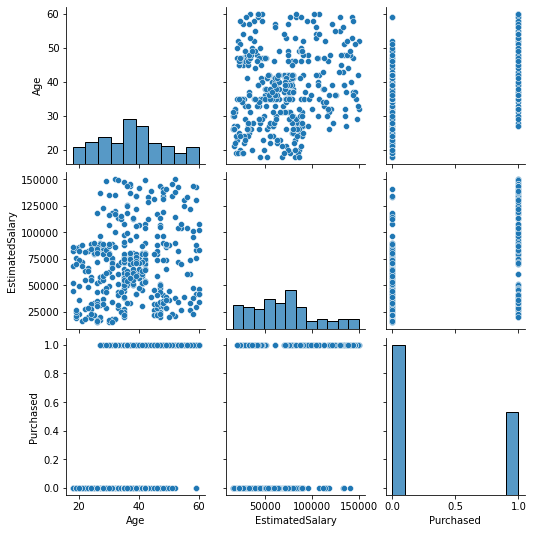

In [9]:
sns.pairplot(df)

<AxesSubplot:>

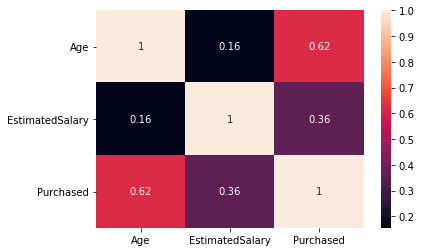

In [10]:
sns.heatmap(df.corr(),annot=True)

From the above plor we can see there is hardly any correlation between Age and Estimated Salary.\
There is high correlation between Purchased and Age

0    0.6425
1    0.3575
Name: Purchased, dtype: float64


<AxesSubplot:>

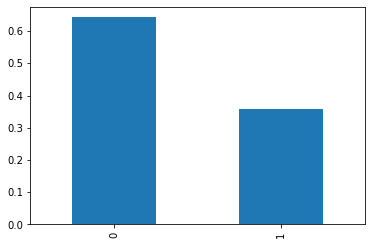

In [20]:
print(df['Purchased'].value_counts()/df.shape[0])
(df['Purchased'].value_counts()/df.shape[0]).plot(kind='bar')

Only 36% people are interested in purchasing the vehicle

<AxesSubplot:>

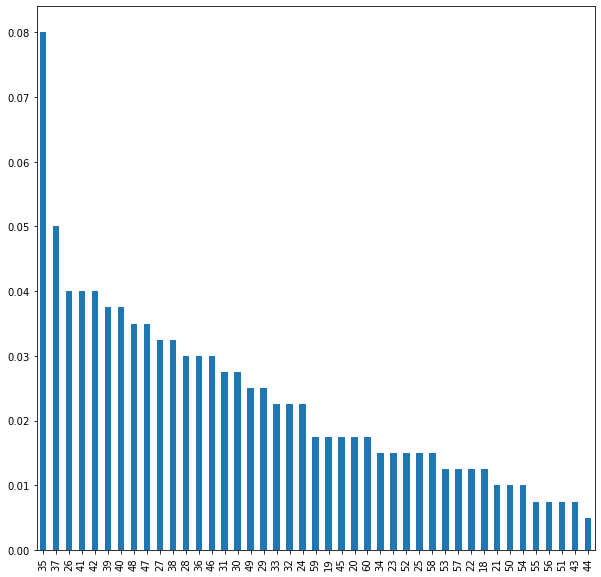

In [23]:
plt.rcParams['figure.figsize']=(10,10)
(df['Age'].value_counts()/df.shape[0]).plot(kind='bar')

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

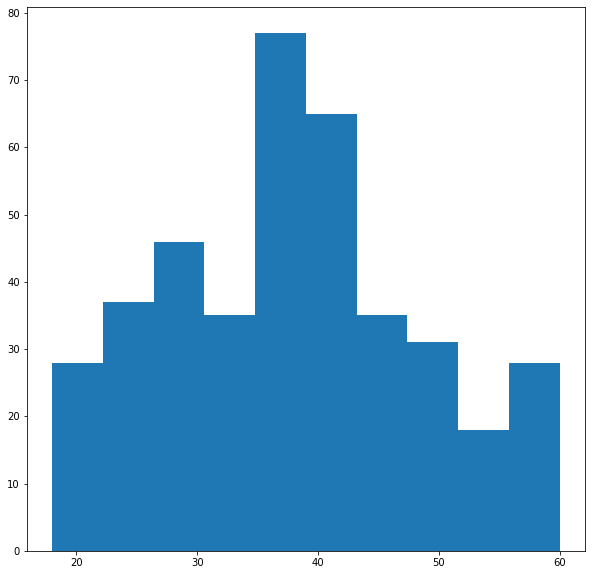

In [24]:
plt.hist(df['Age'])

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <BarContainer object of 10 artists>)

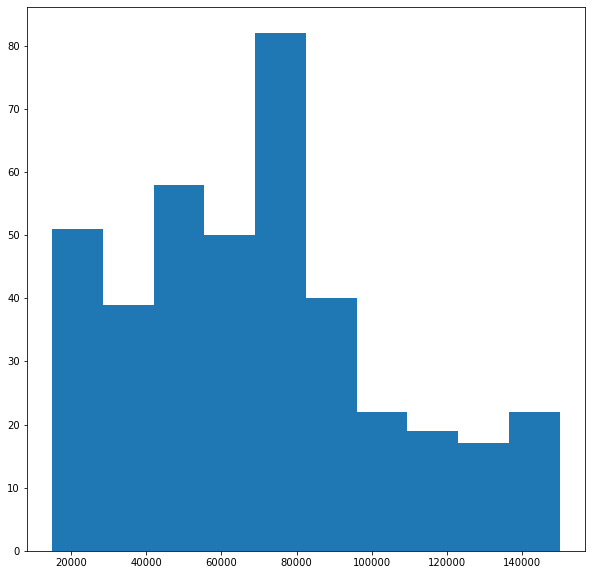

In [29]:
plt.hist(df['EstimatedSalary'])

Female    0.51
Male      0.49
Name: Gender, dtype: float64


<AxesSubplot:>

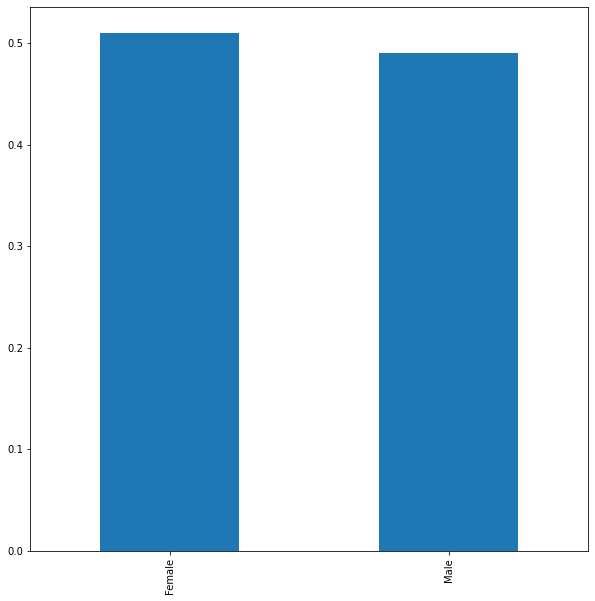

In [34]:
print(df['Gender'].value_counts()/df.shape[0])
(df['Gender'].value_counts()/df.shape[0]).plot(kind='bar')

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

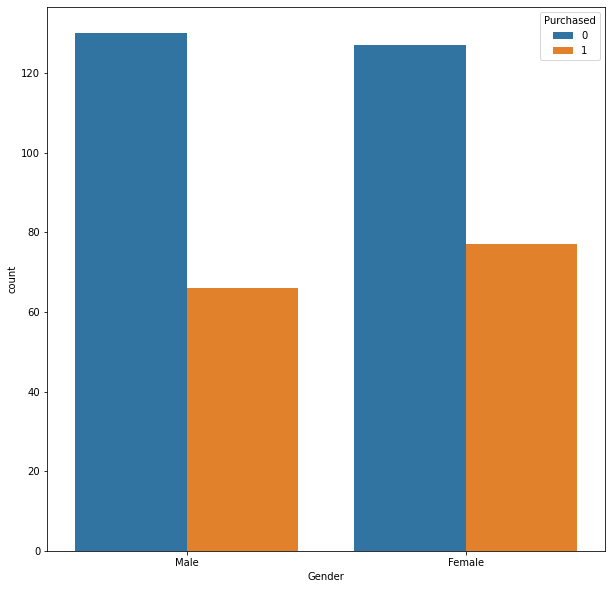

In [37]:
sns.countplot(df['Gender'],hue=df['Purchased'])

One thing we can see that the range between Age and Estimated Salary is huge, this can create inaccurate model.\
We will first build a model without transforming the data. Later, we will normalize our data and see the results

Lets Transform our data

----------------------------- #### -----------------------------

We will first transform Gender column, where Male is 1 and Female is 0

In [38]:
df['Gender'] = df['Gender'].map({'Male':1,"Female":0})

In [39]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


We will build model with the data the way it is, we will normalize it later to see if it gives better result

### Preparing Naive Baise Model

In [41]:
from sklearn.naive_bayes import BernoulliNB as BNB

In [42]:
from sklearn.model_selection import train_test_split
import random

In [65]:
df_x = df.drop(['Purchased'],axis=1)
df_y = df['Purchased']

We Will split our data into 70, 30 split ratio

In [80]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.3, random_state = 121)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 3) (120, 3) (280,) (120,)


In [67]:
classifier_MB = BNB()

In [68]:
classifier_MB.fit(x_train,y_train)

BernoulliNB()

In [69]:
test_pred_m = classifier_MB.predict(x_test)
accuracy_test = np.mean(test_pred_m == y_test)
accuracy_test

0.6166666666666667

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(test_pred_m,y_test)

0.6166666666666667

In [72]:
pd.crosstab(test_pred_m,y_test)

Purchased,0,1
row_0,,
0,74,46


Without any transformation we are getting 62% accuracy, lets normalize our data and see if this improves

## Normalization of our dataset

In [112]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

norm_train = df.copy()
norm_train.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [113]:
norm_train = norm_func(norm_train[['Gender', 'Age', 'EstimatedSalary','Purchased']])
norm_train

,Gender,Age,EstimatedSalary,Purchased
0,1.0,0.023810,0.029630,0.0
1,1.0,0.404762,0.037037,0.0
2,0.0,0.190476,0.207407,0.0
3,0.0,0.214286,0.311111,0.0
4,1.0,0.023810,0.451852,0.0
...,...,...,...,...
395,0.0,0.666667,0.192593,1.0
396,1.0,0.785714,0.059259,1.0
397,0.0,0.761905,0.037037,1.0
398,1.0,0.428571,0.133333,0.0


In [114]:
df_x = norm_train.drop(['Purchased'], axis=1)
df_y = norm_train['Purchased']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 3) (120, 3) (280,) (120,)


In [116]:
classifier_MB = BNB()

In [117]:
classifier_MB.fit(x_train,y_train)

BernoulliNB()

In [118]:
test_pred_m = classifier_MB.predict(x_test)
accuracy_test = np.mean(test_pred_m == y_test)
accuracy_test

0.6583333333333333

In [119]:
pd.crosstab(test_pred_m,y_test)

Purchased,0.0,1.0
row_0,,
0.0,79,41


## When we normalize our data our model prediction increases by 4%